In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

--2020-09-14 16:23:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  22.5MB/s    in 1m 55s  

2020-09-14 16:25:24 (21.6 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [2]:
!unzip -q Positive_tensors.zip 

In [3]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -q Negative_tensors.zip

--2020-09-14 16:30:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  24.4MB/s    in 83s     

2020-09-14 16:31:35 (24.4 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]



In [4]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from torchsummary import summary
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [5]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [6]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="/content/"
        positive="/content/Positive_tensors"
        negative='/content/Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("done")

done


In [7]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


In [8]:
train_dataset[1][1]

tensor(0)

In [ ]:
validation_dataset[0][1]

tensor(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


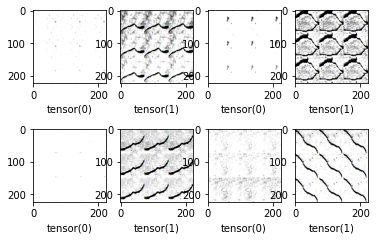

In [9]:
for i in range(1,9):
  #for j in range(4):
      plt.subplot(2,4,i)
      plt.imshow(validation_dataset[i][0].reshape(224,224,3))
      plt.xlabel(validation_dataset[i][1])

In [10]:
# Step 1: Load the pre-trained model resnet18


model = models.resnet18(pretrained = True)
#model = model.to('cuda')


mean = [0.485, 0.486, 0.406]
std = [0.229, 0.224, 0.225]

#compose:

composed = transforms.Compose([transforms.Resize(224), 
                             transforms.ToTensor(),
                             transforms.Normalize(mean, std)])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [11]:
# Step 2: Set the parameter cannot be trained for the pre-trained model

for param in model.parameters():
    param.requires_grad = False

In [12]:
#replace output layer:

model.fc =nn.Linear(512, 2)

In [14]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
model.cuda()
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

## **TRAIN THE MODEL**

In [15]:
# Step 1: Create the loss function

criterion = nn.CrossEntropyLoss()

In [16]:
# Step 2: Create a training loader and validation loader object, the batch size should have 100 samples each.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100)

In [17]:
#Step 3: Use the following optimizer to minimize the loss

optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [ ]:
#torch.cuda.set_device(0)

In [18]:
n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()
count = 1
#n_epochs
i = 0
Loss=0
start_time = time.time()
#print('Start time:', start_time)
for epoch in range(n_epochs):
    for x, y in train_loader:
        x, y = x.cuda(), y.cuda()
        #print('Model Start Training:', i)
        print("train: time for loading batch {} is {}".format(i,time.time() - start_time))
        i+=1
        model.train() 
        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x)
        # calculate loss
        loss = criterion(z, y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        loss_list.append(loss.data)
    
    correct=0
    errorred=0
    for x_test, y_test in validation_loader:
        # set model to eval 
        x_test , y_test = x_test.cuda() , y_test.cuda()
        print("validation: time for loading batch {} is {}".format(i+1,time.time() - start_time))
        i+=1
        model.eval()
        #make a prediction 
        z=model(x_test)
        #find max
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        #Calculate misclassified  samples in mini-batch 
        errorred += (yhat != y_test).sum().item()
        #hint +=(yhat==y_test).sum().item()
        
    accuracy=correct/N_test
    accuracy_list.append(accuracy)


train: time for loading batch 0 is 1.4888527393341064
train: time for loading batch 1 is 3.071138858795166
train: time for loading batch 2 is 4.642005443572998
train: time for loading batch 3 is 6.071185350418091
train: time for loading batch 4 is 7.557691812515259
train: time for loading batch 5 is 9.042699098587036
train: time for loading batch 6 is 10.455331087112427
train: time for loading batch 7 is 11.845894813537598
train: time for loading batch 8 is 13.346498012542725
train: time for loading batch 9 is 14.851588249206543
train: time for loading batch 10 is 16.351694107055664
train: time for loading batch 11 is 17.845475912094116
train: time for loading batch 12 is 19.36715579032898
train: time for loading batch 13 is 20.855409860610962
train: time for loading batch 14 is 22.446927309036255
train: time for loading batch 15 is 23.96554660797119
train: time for loading batch 16 is 25.453776121139526
train: time for loading batch 17 is 26.951563835144043
train: time for loading bat

In [ ]:
correct=0
errorred=0
error_list = []
error1 =0
error_list2 =[]
for x_test, y_test in validation_loader:
        # set model to eval 
        x_test , y_test = x_test.cuda() , y_test.cuda()
        print("validation: time for loading batch {} is {}".format(i+1,time.time() - start_time))
        i+=1
        model.eval()
        #make a prediction 
        z=model(x_test)
        #find max
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        #Calculate misclassified  samples in mini-batch 
        errorred += (yhat != y_test).sum().item()
        error1 = (yhat != y_test).sum().item()
        #hint +=(yhat==y_test).sum().item()
        error_list.append(errorred)
        error_list2.append(error1)
        
        accuracy=correct/N_test
        accuracy_list.append(accuracy)

In [19]:
(accuracy_list)

[0.9945]

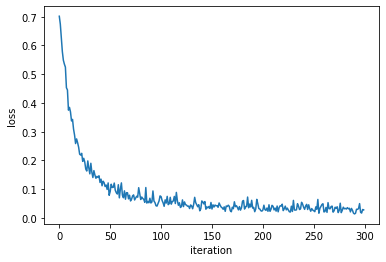

In [20]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


In [23]:
i=0
#a = 0
count = 0
error_check = 0
for x_test, y_test in validation_loader:
  x_test , y_test = x_test.cuda() , y_test.cuda()
  print("validation: loading batch {}".format(i))
  model.eval()
  z=model(x_test)
  _, yhat = torch.max(z.data, 1)
  #error_check = (yhat != y_test).sum().item()
  if torch.equal(yhat, y_test) == False:
    #yhat = yhat.numpy()
    print("error in sample {} predicted value: {} actual value: {}".format(i, yhat, y_test))
    count+=1
  if count >4:
    break
  i+=1



validation: loading batch 0
error in sample 0 predicted value: tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0], device='cuda:0') actual value: tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0], device='cuda:0')
validation: loading batch 1
validation: loading batch 2
error in sample 2 predicted value: tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0

In [29]:
validation_loader2 = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 1)
count = 0
for (x, y) in (validation_loader2):
  x , y = x_test.cuda() , y_test.cuda()
  model.eval()
  z = model(x)
  _,yhat = torch.max(z.data, 1)
  if (yhat != y):
    print('Sample{} predicted: {}, actual value: {}'.format(str(i), str(y_hat), str(y)))
    print()
    count +=1
    if count >=4:
      break


RuntimeError: ignored

In [33]:
validation_loader2 = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 1)
i=301
a = 0
b=0
count = 0
error_check = 0
for x_test, y_test in validation_loader2:
  x_test , y_test = x_test.cuda() , y_test.cuda()
  #print("validation: loading batch {}".format(i))
  model.eval()
  z=model(x_test)
  _, yhat = torch.max(z.data, 1)
  if torch.equal(yhat, y_test)== False:
    x_test , y_test = x_test.cpu() , y_test.cpu()
    yhat = yhat.cpu()
    for a, b in zip(yhat, y_test):
      if a != b:
        print("error in sample {} predicted value: {} actual value: {}".format(i, yhat, y_test))
        count+=1
  if count >3:
    break
  i+=1



error in sample 388 predicted value: tensor([1]) actual value: tensor([0])
error in sample 590 predicted value: tensor([1]) actual value: tensor([0])
error in sample 627 predicted value: tensor([0]) actual value: tensor([1])
error in sample 639 predicted value: tensor([0]) actual value: tensor([1])


In [ ]:
i=301
a = 0
b=0
count = 0
error_check = 0
for x_test, y_test in validation_loader:
  x_test , y_test = x_test.cuda() , y_test.cuda()
  #print("validation: loading batch {}".format(i))
  model.eval()
  z=model(x_test)
  _, yhat = torch.max(z.data, 1)
  if torch.equal(yhat, y_test)== False:
    for a, b in zip(yhat, y_test):
      if a != b:
        print("error in sample {} predicted value: {} actual value: {}".format(i, yhat[a], y_test[b]))
        count+=1
  if count >3:
    break
  i+=1



error in sample 301 predicted value: 0 actual value: 1
error in sample 303 predicted value: 0 actual value: 1
error in sample 304 predicted value: 1 actual value: 0
error in sample 304 predicted value: 1 actual value: 0


In [ ]:
import numpy
r = [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0]

t = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0]



In [ ]:
for i, j in zip(r,t):
  if (i !=j):
    print (r[i])

1
0


In [ ]:
#yhat_numpy = yhat.numpy()
for n in yhat, y_test:
      print("predicted:",yhat.numpy[0])
      print("acutal:",y_test.numpy[0])
      #n+=1
  



TypeError: ignored

In [ ]:
error=misclass/N_test
missclass_list.append(error)

In [ ]:
(error_list2)

[0,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2]

In [ ]:
missclass_list

[0.9947, 0.0053]

In [ ]:
print(torch.max(z.data,1))

torch.return_types.max(
values=tensor([4.2520, 2.6132, 5.1475, 2.9060, 4.2060, 1.4343, 1.5211, 2.5939, 3.6198,
        3.3085, 4.9189, 1.4006, 3.3816, 1.2394, 2.7406, 2.7225, 3.3244, 3.0022,
        2.3975, 2.2231, 4.3242, 0.3978, 2.3276, 2.6545, 3.2793, 3.6135, 1.8187,
        3.7481, 4.0561, 3.4569, 1.6317, 3.3738, 1.9646, 1.5517, 2.2704, 3.6555,
        1.5182, 3.6879, 2.5261, 3.0953, 4.3931, 2.4503, 0.5659, 2.5666, 1.9511,
        2.8170, 4.1585, 1.6236, 4.6890, 1.7054, 0.9591, 2.4691, 3.3008, 2.7835,
        2.7139, 4.3850, 1.4551, 2.3654, 0.3011, 1.8635, 2.9303, 2.1913, 2.6016,
        1.5118, 4.2391, 2.9750, 2.8665, 2.7954, 3.2563, 3.0557, 3.0000, 1.9833,
        2.2748, 2.4541, 5.4514, 2.8333, 5.8447, 3.1462, 0.9276, 3.3187, 5.0160,
        1.9258, 3.3588, 1.7694, 1.6582, 2.0777, 2.9571, 2.0545, 1.7263, 2.5336,
        3.0033, 1.8232, 2.1530, 3.7493, 2.7448, 2.7293, 3.5056, 1.9322, 4.5586,
        1.7778], device='cuda:0'),
indices=tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
for x_test, y_test in validation_loader:
  x_test , y_test = x_test.cuda() , y_test.cuda()
  i=0
  for i in range(1):
    if (_,yhat[i] != y_test[i]):
      #print(yhat[i])
      print(len(y_test))
      #print(y_test[i])
    #print(validation_dataset.index(y_test))
      i+=1
  #if i==1:
  #  break
    #print(y_test[i])
    i+=1
    #print("Sample index not equal{}".format(validation_dataset[x_test]))
    #plt.imshow(validation_dataset[0][0].reshape(224,224,3))
    #count+=1
    #if count==1:
    #  break


100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


KeyboardInterrupt: ignored

In [ ]:
count = 0
for x_test, y_test in validation_dataset:
    x_test , y_test = x_test.cuda() , y_test.cuda()
    z = model(x_test.reshape(-1, 3, 7, 7))
    _, yhat = torch.max(z.data, 1)
    #print(yhat)
    #print(y_test)
    for i in yhat:
        if (_, yhat != y_test):
            print("predicted value:", yhat[i])
            print("actual value:", y_test[i])
        count += 1
    if count==4:
      break

predicted value: tensor(0, device='cuda:0')


IndexError: ignored

In [ ]:
accuracy = x.history['acc']
val_accuracy = x.history['val_acc']
loss = x.history['loss']
val_loss = x.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

AttributeError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


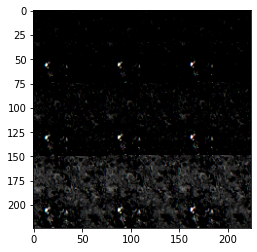

In [ ]:
image1 = x_test[1].reshape(224,224,3)
plt.imshow(image1)

In [ ]:
z1 = model(x.reshape(224, 3, 32, 7))

RuntimeError: ignored

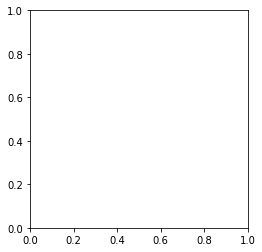

In [ ]:
torch.save()

In [ ]:
yhat

tensor([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0])

In [ ]:
y_test

tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


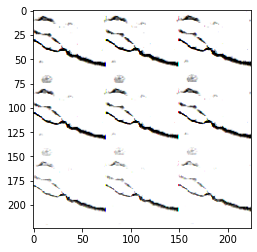

In [ ]:
image = x_test[2].reshape(224,224,3)
plt.imshow(image)
print(y_test[2])
sample = validation_dataset[:,]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


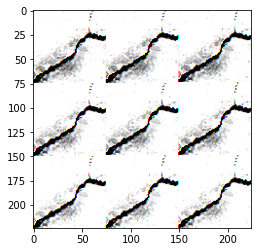

In [ ]:
plt.imshow(first_image)

In [ ]:
first_label = y_test[0]

In [ ]:
print(first_label)

tensor(1)


TypeError: ignored

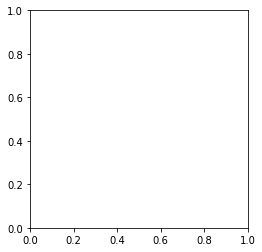

In [ ]:
plt.imshow(validation_dataset[0][0])

In [ ]:
# Example of a picture
index = 2
plt.imshow(validation_dataset[0].reshape(224, 224, 3))
print ("y = " + str(y_test[0,index]) + ". It's a " + classes[y_test[0,index]].decode("utf-8") +  " picture.")

AttributeError: ignored

In [ ]:
correct=0
error_miss = 0
for x_test, y_test in validation_loader:
        # set model to eval 
    x_test , y_test = x_test.cuda() , y_test.cuda()
        #print("validation: time for loading batch {} is {}".format(i+1,time.time() - start_time))
        #i+=1
    model.eval()
        #make a prediction 
    z=model(x_test)
        #find max
    _, yhat = torch.max(z.data, 1)
    correct += (yhat == y_test).sum().item()
    #error_miss += (yhat == y_test).sum().item
        #Calculate misclassified  samples in mini-batch 
        #hint +=(yhat==y_test).sum().item()

In [ ]:
correct

9956

In [ ]:
for i in range(100):
  test = validation_dataset[i][1]
  test.cuda()
  print ([test])

In [ ]:
yhat

tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0], device='cuda:0')

In [ ]:
sample=0
for i in validation_dataset:
  for x_test, y_test in validation_dataset:
    x_test , y_test = x_test.cuda() , y_test.cuda()
    print (y_test)
    print(yhat)
    y_test = y_test.cpu()
    print (y_test)
    if (y_test != yhat):
      y_test = y_test.cpu()
      print('predicted value', yhat[i])
      print('acctual value', y_test[i])



tensor(1, device='cuda:0')
tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0], device='cuda:0')
tensor(1)


RuntimeError: ignored

In [ ]:
validation_dataset

AttributeError: ignored

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(224, 224, 3))#, cmap='coolwarm')
    plt.title('y = ' + str(data_sample[1].item()))

In [ ]:
## Plot the misclassified samples

#Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(224, 3, 32, 7))
    yhat = torch.max(z, 1)
    if yhat != y:
        #print(validation_dataset[])
        show_data((x, y))
        plt.show()       
        #print(\"yhat:\", yhat)
        #print("probability of class \", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 4:
        break

RuntimeError: ignored

In [ ]:
# Plot the misclassified samples

#Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    #x, y =x.cuda(), y.cuda()
    #z = model(x.reshape(224, 3, 32, 7))
    yhat = torch.max(z.data, 1)
    if yhat != y:
        x, y = x.cpu(), y.cpu()
        #show_data((x, y))
        #plt.show()
        print('sample', validation_dataset.iloc[index])
        print("yhat:", yhat)
        print ('y', y)
        #print()
        #print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 4:
        break

RuntimeError: ignored

In [ ]:
classes = validation_dataset()

TypeError: ignored

In [ ]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    classes = validation_dataset()
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [ ]:
print_mislabeled_images(classes, x_test, y_test, p=yhat)

NameError: ignored